# 라이브러리 임포트
실습에 필요한 라이브러리를 임포트합니다.

In [1]:
from sklearn import datasets
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# sklearn 모델의 동일한 결과 출력을 위해 선언합니다.
np.random.seed(5)

# 손글씨 데이터 로드

In [2]:
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target

# 교차 검증
교차 검증을 10번 수행하여, 10번의 교차 검증 평균 정확도를 저장합니다.

In [3]:
def cross_validation(classifier,features, labels):
    cv_scores = []

    for i in range(10):
        scores = cross_val_score(classifier, features, labels, cv=10, scoring='accuracy')
        cv_scores.append(scores.mean())
    
    return cv_scores

In [4]:
dt_cv_scores = cross_validation(tree.DecisionTreeClassifier(), features, labels)

In [5]:
rf_cv_scores = cross_validation(RandomForestClassifier(), features, labels)

# 랜덤포레스트 VS 의사결정트리 시각화
라인 차트를 통해 랜덤포레스트가 의사결정트리보다 매번 정확도가 높은 것을 확인할 수 있습니다.

In [6]:
cv_list = [    
            ['random_forest',rf_cv_scores],
            ['decision_tree',dt_cv_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))

<AxesSubplot:>

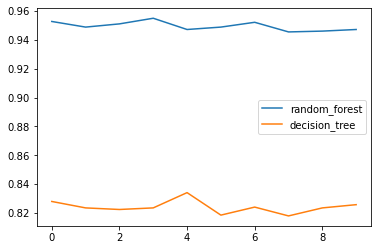

In [7]:
df.plot()

# 의사결정트리 정확도

In [8]:
np.mean(dt_cv_scores)

0.8241843575418993

# 랜덤포레스트 정확도

In [9]:
np.mean(rf_cv_scores)

0.9494096834264433